# Praxiskurs Statistik FSS 21

## Organisatorisches
Modul 
* Schlüsselqualifikation 2
* wird nicht benotet (nur bestanden / nicht bestanden)
* 8 Termine freitags von 13:30 Uhr bis 16:00 Uhr
* keine Übungsblätter, aber Teilnahme- und Mitarbeitpflicht  

Inhalte
* erweiterte Kenntnisse zur Programmiersprache R und relevanten Paketerweiterungen
* Einführung in die Themen Datenaufbereitung, Datenanalyse, Datenvisualisierung 


Prüfung 
* außerhalb der Klausurenphase
* viertelstündige Präsentation einer vorbereiteten Datenanalyse vor Prof. Schlather

Setup
* R und Rstudio
* (optional) Jupyter Notebook mit R Kernel (https://github.com/IRkernel/IRkernel)
* (optional) git (https://git-scm.com/downloads) 

# Agenda für heute
* Recap Datenstrukturen und Dateneingabe in R
* Aufbereitung in Base R
* Plots in Base R


## Los geht's


In [1]:
# Mit setwd setzt ihr in R euer "working directory"
setwd("~/Documents/Praxiskurs_FSS21/")

In [2]:
# Daten werden eingelesen mit der Funktion read.csv bzw read.csv2
df_covid <- read.csv("data/RKI_COVID19.csv")

Das Einlesen von Datensätzen kann manchmal etwas dauern. Trotzdem ist es gerade bei größeren Tabellen empfehlenswert, nicht vorher mithilfe von Excel o.ä. zuzugreifen.

https://www.bbc.com/news/technology-54423988

In [3]:
?read.csv2

In [4]:
library(readr)
help(read_csv)

In [5]:
# Die Funktion str gibt grundlegende Informationen über R-Objekte aus
str(df_covid)

'data.frame':	1678031 obs. of  18 variables:
 $ FID                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ IdBundesland        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Bundesland          : Factor w/ 16 levels "Baden-Württemberg",..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Landkreis           : Factor w/ 412 levels "LK Ahrweiler",..: 336 336 336 336 336 336 336 336 336 336 ...
 $ Altersgruppe        : Factor w/ 7 levels "A00-A04","A05-A14",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Geschlecht          : Factor w/ 3 levels "M","unbekannt",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ AnzahlFall          : int  1 1 1 1 1 1 2 1 1 1 ...
 $ AnzahlTodesfall     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Meldedatum          : Factor w/ 433 levels "2020/01/07 00:00:00",..: 236 265 270 287 290 315 334 336 337 344 ...
 $ IdLandkreis         : int  1001 1001 1001 1001 1001 1001 1001 1001 1001 1001 ...
 $ Datenstand          : Factor w/ 1 level "16.04.2021, 00:00 Uhr": 1 1 1 1 1 1 1 1 1 1 ...
 $ NeuerFall           : int  0 0 0 0 0 0 0 0 0 0 ...


Wir sehen, dass der Datensatz als Data Frame eingelesen wurde und über 1,6 Mio. Einträge hat. Im Unterschied zu Matrizen, können Data Frames in R Tabellen mit unterschiedlichen Datentypen speichern, beispielsweise sehen wir hier, dass die Spalte "Bundesland" ein Faktor-Variablen beinhaltet und die Spalte "AnzahlFall" Integer-Werte.

In [6]:
# Mehr Informationen zu data frames stehen in der Dokumentation
help(data.frame)

In [7]:
# Auch ganz interessant: die head Funktion
head(df_covid)

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>
1,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
2,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
3,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
4,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
5,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt
6,6,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/12/18 00:00:00,1001,"16.04.2021, 00:00 Uhr",0,-9,2020/12/14 00:00:00,0,1,1,Nicht übermittelt


In [8]:
# Um alle Spaltennamen zu kriegen, existiert colnames 
colnames(df_covid)

[1] "FID"                  "IdBundesland"         "Bundesland"          
 [4] "Landkreis"            "Altersgruppe"         "Geschlecht"          
 [7] "AnzahlFall"           "AnzahlTodesfall"      "Meldedatum"          
[10] "IdLandkreis"          "Datenstand"           "NeuerFall"           
[13] "NeuerTodesfall"       "Refdatum"             "NeuGenesen"          
[16] "AnzahlGenesen"        "IstErkrankungsbeginn" "Altersgruppe2"

Auf Spalten der Tabelle können wir auf unterschiedliche Arten zugreifen

In [9]:
df_covid$IdBundesland

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [469] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [505] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [541] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [577] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [613] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [649] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [685] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [721] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [757] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [793] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [829] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [901] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [937] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [973] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1441] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1477] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1513] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1549] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1585] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1621] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1657] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1693] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1729] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1765] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [10]:
df_covid[1]

FID
<int>
1
2
3
4
5
6
7
8
9


In [11]:
df_covid["Bundesland"]

Bundesland
<fct>
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein
Schleswig-Holstein


In [12]:
df_covid[[1]]

[1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391   392   393   394   395   396
  [397]   397   398   399   400   401   402   403   404   405   406   407   408
  [409]   409   410   411   412   413   414   415   416   417   418   419   420
  [421]   421   422   423   424   425   426   427   428   429   430   431   432
  [433]   433   434   435   436   437   438   439   440   441   442   443   444
  [445]   445   446   447   448   449   450   451   452   453   454   455   456
  [457]   457   458   459   460   461   462   463   464   465   466   467   468
  [469]   469   470   471   472   473   474   475   476   477   478   479   480
  [481]   481   482   483   484   485   486   487   488   489   490   491   492
  [493]   493   494   495   496   497   498   499   500   501   502   503   504
  [505]   505   506   507   508   509   510   511   512   513   514   515   516
  [517]   517   518   519   520   521   522   523   524   525   526   527   528
  [529]   529   530   531   532   533   534   535   536   537   538   539   540
  [541]   541   542   543   544   545   546   547   548   549   550   551   552
  [553]   553   554   555   556   557   558   559   560   561   562   563   564
  [565]   565   566   567   568   569   570   571   572   573   574   575   576
  [577]   577   578   579   580   581   582   583   584   585   586   587   588
  [589]   589   590   591   592   593   594   595   596   597   598   599   600
  [6

In [13]:
# Auch hier: help Funktion 
help("[[")

Beispiel für Doppelklammer: str.split

In [14]:
bundeslaender  <- unique(df_covid$Bundesland)
print(bundeslaender)

 [1] Schleswig-Holstein     Hamburg                Niedersachsen         
 [4] Bremen                 Nordrhein-Westfalen    Hessen                
 [7] Rheinland-Pfalz        Baden-Württemberg      Bayern                
[10] Saarland               Berlin                 Brandenburg           
[13] Mecklenburg-Vorpommern Sachsen                Sachsen-Anhalt        
[16] Thüringen             
16 Levels: Baden-Württemberg Bayern Berlin Brandenburg Bremen ... Thüringen


In [15]:
bundeslaender <- as.character(bundeslaender)
# Bundeslaender mit Bindestrich trennen:
strsplit(bundeslaender,"-")

[[1]]
[1] "Schleswig" "Holstein" 

[[2]]
[1] "Hamburg"

[[3]]
[1] "Niedersachsen"

[[4]]
[1] "Bremen"

[[5]]
[1] "Nordrhein" "Westfalen"

[[6]]
[1] "Hessen"

[[7]]
[1] "Rheinland" "Pfalz"    

[[8]]
[1] "Baden"       "Württemberg"

[[9]]
[1] "Bayern"

[[10]]
[1] "Saarland"

[[11]]
[1] "Berlin"

[[12]]
[1] "Brandenburg"

[[13]]
[1] "Mecklenburg" "Vorpommern" 

[[14]]
[1] "Sachsen"

[[15]]
[1] "Sachsen" "Anhalt" 

[[16]]
[1] "Thüringen"

In [16]:
# Großer Unterschied: Einfache Klammer liefert wieder eine Liste wenn sie auf data frames angwerdet wird 
print(str(df_covid["Bundesland"]))
print(str(df_covid$Bundesland))

'data.frame':	1678031 obs. of  1 variable:
 $ Bundesland: Factor w/ 16 levels "Baden-Württemberg",..: 15 15 15 15 15 15 15 15 15 15 ...
NULL
 Factor w/ 16 levels "Baden-Württemberg",..: 15 15 15 15 15 15 15 15 15 15 ...
NULL


Teile des Datensatzes können durch Bedingungen (booleans) extrahiert werden, beispielsweise wenn uns nur die Infektionen in Baden-Württemberg interessieren

In [17]:
head(df_covid[df_covid$Bundesland=="Baden-Württemberg",])

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>
742501,742501,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,3,0,2020/12/04 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/04 00:00:00,0,3,0,Nicht übermittelt
742502,742502,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,6,0,2020/12/05 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/05 00:00:00,0,6,0,Nicht übermittelt
742503,742503,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,1,0,2020/12/06 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/05 00:00:00,0,1,1,Nicht übermittelt
742504,742504,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,9,0,2020/12/07 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/07 00:00:00,0,9,0,Nicht übermittelt
742505,742505,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,2,0,2020/12/08 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/07 00:00:00,0,2,1,Nicht übermittelt
742506,742506,8,Baden-Württemberg,SK Stuttgart,A05-A14,M,3,0,2020/12/08 00:00:00,8111,"16.04.2021, 00:00 Uhr",0,-9,2020/12/08 00:00:00,0,3,0,Nicht übermittelt


## Aufgabe (15-20 Minuten)
* Ladet den Datensatz in R ein und macht euch mit der Funktion "View" vertraut
* Gebt die übermittelnden Landkreise aus und speichert die Variable als character
* Berechnet die Gesamtanzahl an Fällen im Stadtkreis Mannheim 
* Berechnet die Anzahl an **weiblichen** Fällen in Deutschland am 15. April

Etwas schwieriger:
* Berechnet die Anzahl an Fällen in Deutschland seit dem 01. April 

## Plots
In R sind bereits viele Plot-Funktionen eingebaut, welche durch Pakete ergänzt werden. Im Folgenden werden wir uns Histogramme und Scatter-Plots anschauen

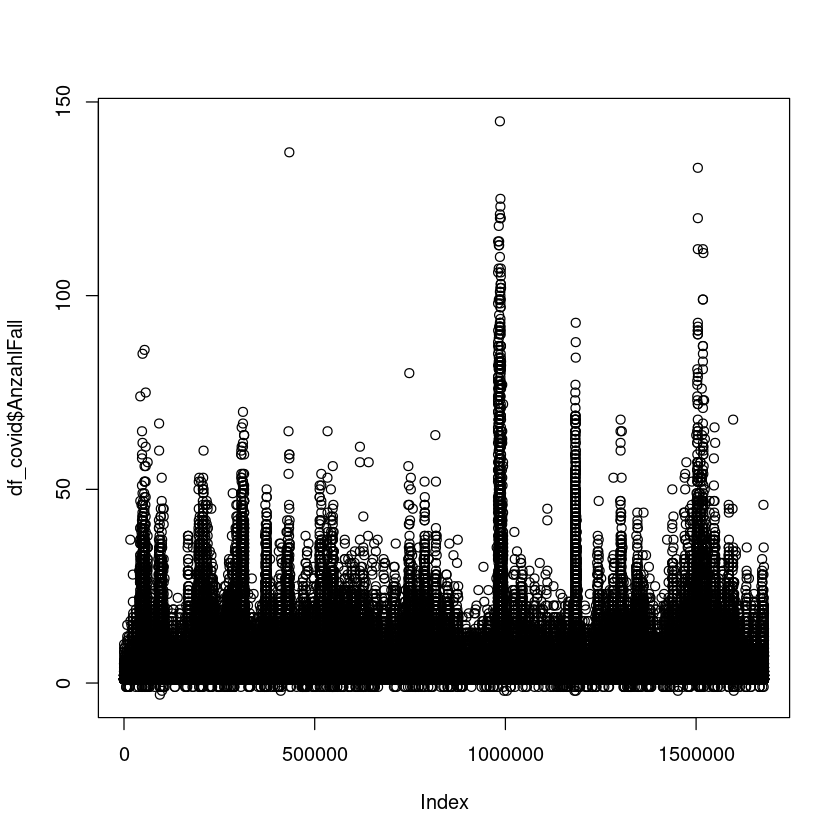

In [18]:
plot(df_covid$AnzahlFall)

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”


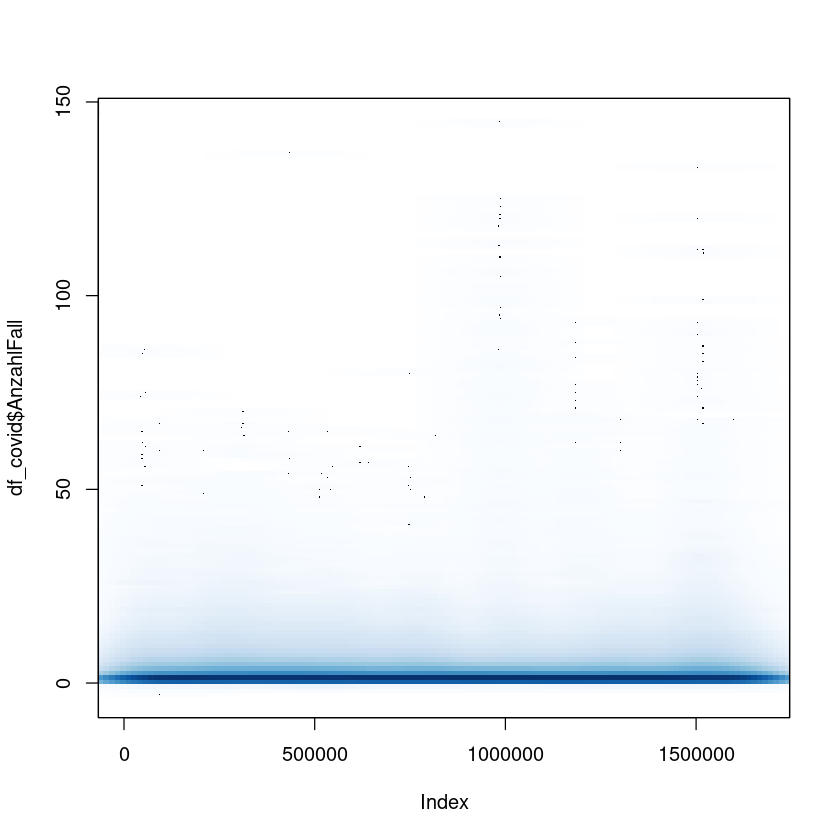

In [19]:
smoothScatter(df_covid$AnzahlFall)

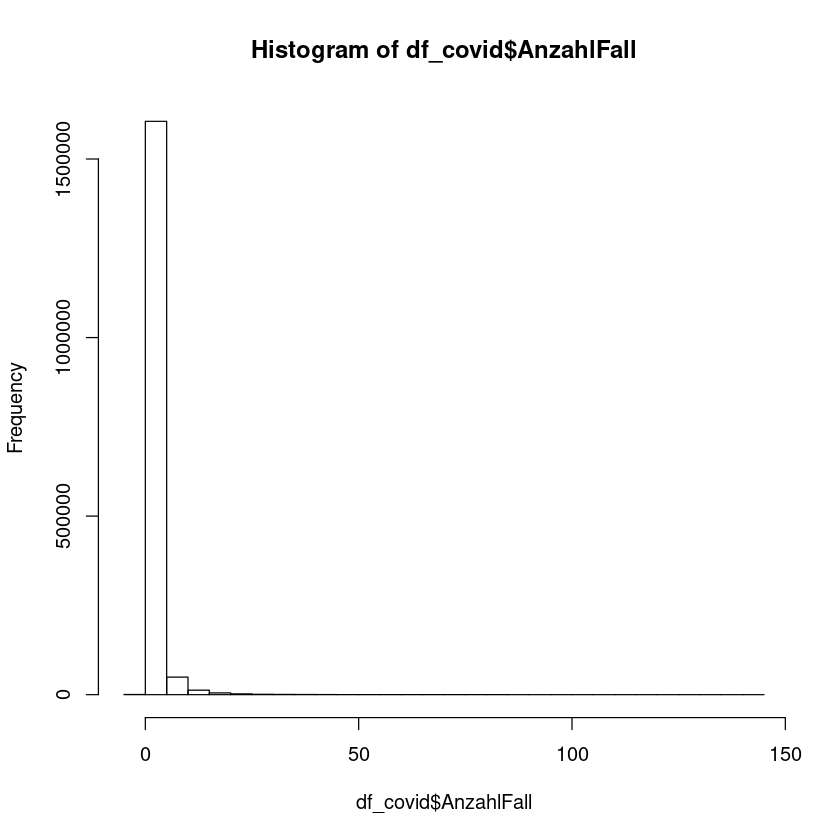

In [20]:
hist(df_covid$AnzahlFall)

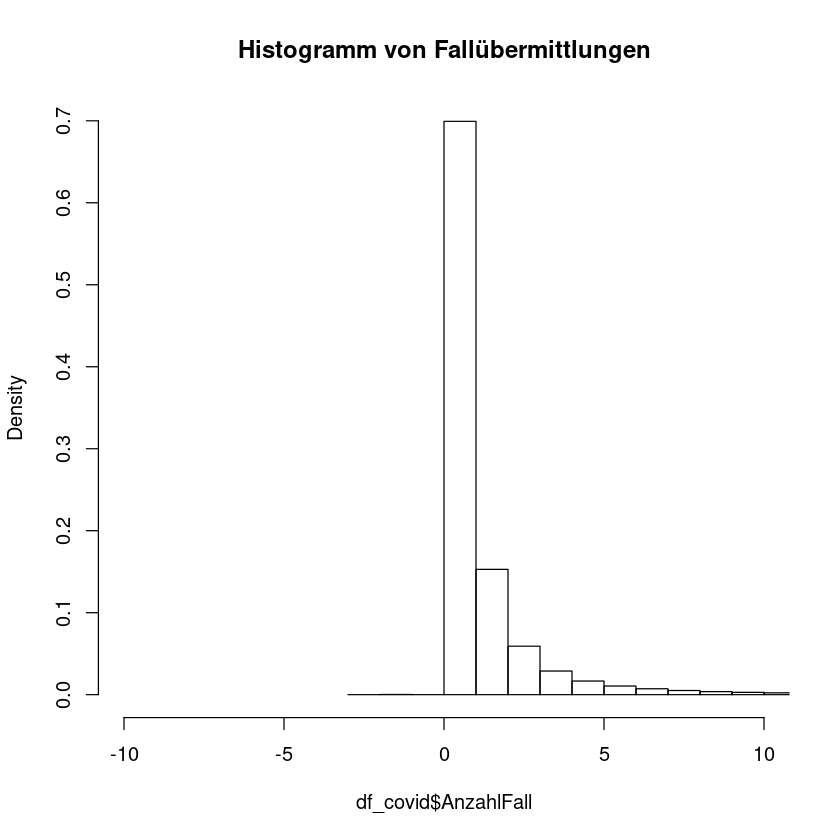

In [21]:
hist(df_covid$AnzahlFall,breaks=200,xlim=c(-10,10),freq=FALSE, main="Histogramm von Fallübermittlungen")

In [22]:
summary(df_covid$AnzahlFall)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.000   1.000   1.000   1.847   2.000 145.000 

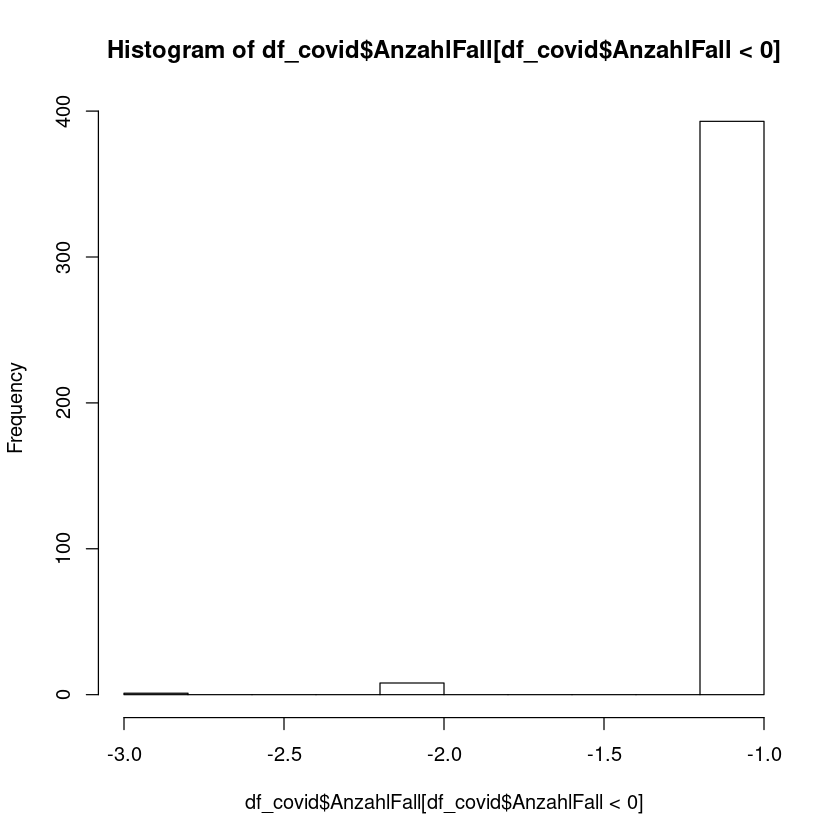

In [23]:
hist(df_covid$AnzahlFall[df_covid$AnzahlFall<0])

In [24]:
# Nun schauen wir uns die Fallzahlen pro Tag für Deutschland an
dates <- unique(df_covid$Meldedatum)
cases_per_day <- double(length(dates))
for(day in 1:length(dates)){
    cases_per_day[day]  <- sum(df_covid$AnzahlFall[df_covid$Meldedatum == dates[day]])
}
head(data.frame(dates=dates, cases=cases_per_day))

,dates,cases
,<fct>,<dbl>
1,2020/09/30 00:00:00,2733
2,2020/10/29 00:00:00,19858
3,2020/11/03 00:00:00,19348
4,2020/11/20 00:00:00,22306
5,2020/11/23 00:00:00,15096
6,2020/12/18 00:00:00,29787


In [25]:
# Eine elegantere und etwas schnellere Methode liefert sapply
help(sapply)

In [26]:
# Damit bekommen wir das gleiche Ergebnis, nur kompakter geschrieben
cases_per_day  <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
str(cases_per_day)

 int [1:433] 2733 19858 19348 22306 15096 29787 27995 24545 16661 13410 ...


In [27]:
# Wir speichern die Daten im richten Format und erstellen einen data frame dafür
dates <- as.POSIXct(dates, format="%Y/%m/%d")
df_cases_per_day <- data.frame(dates=dates,cases=cases_per_day)
head(df_cases_per_day)

,dates,cases
,<dttm>,<int>
1,2020-09-30,2733
2,2020-10-29,19858
3,2020-11-03,19348
4,2020-11-20,22306
5,2020-11-23,15096
6,2020-12-18,29787


In [28]:
range(df_cases_per_day$dates)

[1] "2020-01-07 CET"  "2021-04-15 CEST"

In [29]:
# Order und sort liefern Sortiermethoden
help(order)

In [30]:
head(sort(df_cases_per_day$dates))

[1] "2020-01-07 CET" "2020-01-19 CET" "2020-01-23 CET" "2020-01-25 CET"
[5] "2020-01-28 CET" "2020-01-29 CET"

In [31]:
head(order(df_cases_per_day$dates))

[1] 419 431 430 417 428 424

In [32]:
(df_cases_per_day <- df_cases_per_day[order(df_cases_per_day$dates),])

,dates,cases
,<dttm>,<int>
419,2020-01-07,1
431,2020-01-19,1
430,2020-01-23,1
417,2020-01-25,1
428,2020-01-28,2
424,2020-01-29,2
427,2020-01-31,5
423,2020-02-03,1
414,2020-02-04,4


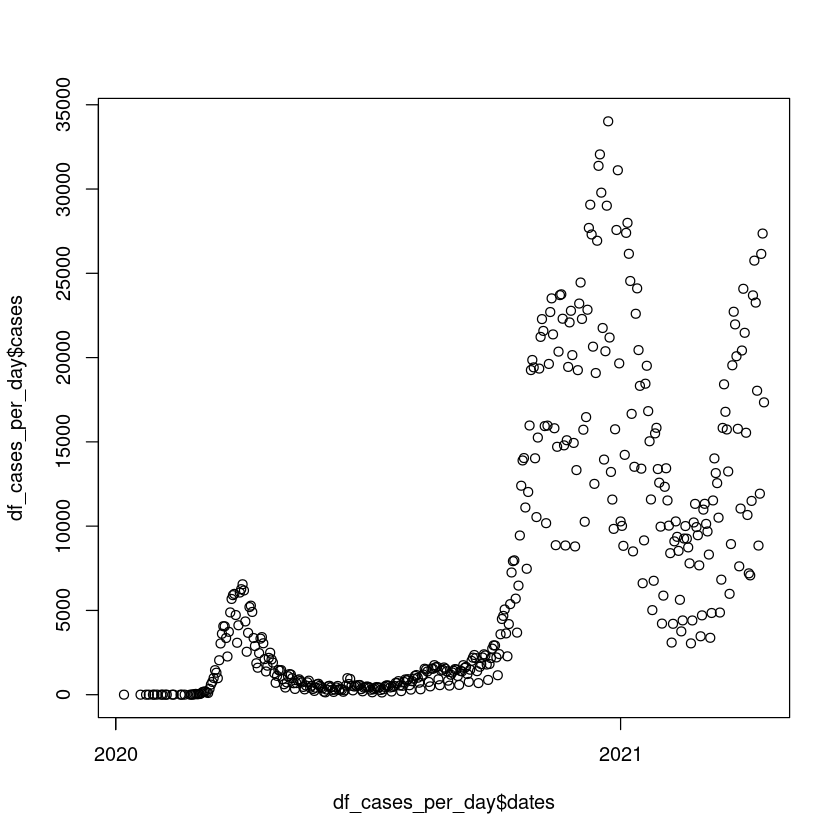

In [33]:
plot(df_cases_per_day$dates,df_cases_per_day$cases)

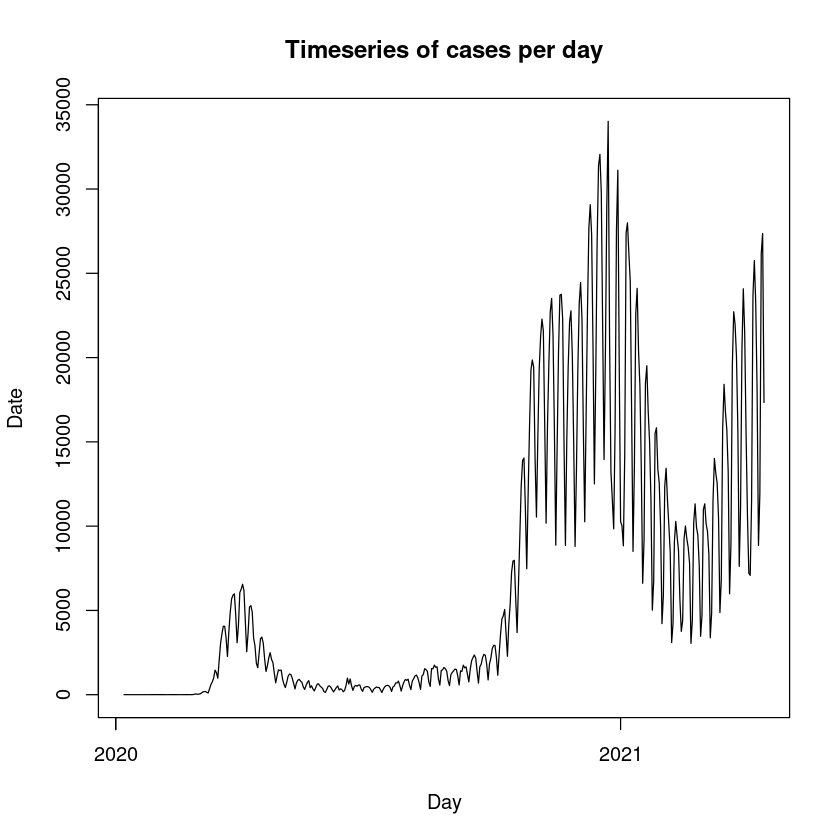

In [34]:
plot(df_cases_per_day$dates,df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")

In [46]:
# Mit dem POSIX Format lassen sich auch einfach Informationen aus Datumsangaben extrahieren, 
# beispielsweise den Wochentag
df_cases_per_day$wday  <- weekdays(df_cases_per_day$dates)
head(df_cases_per_day$wday)

[1] "Dienstag"   "Sonntag"    "Donnerstag" "Samstag"    "Dienstag"  
[6] "Mittwoch"

In [50]:
# Damit können wir uns auch die Gesamtanzahl an Fällen pro Wochentag anschauen
wdays <- c("Montag","Dienstag","Mittwoch","Donnerstag","Freitag","Samstag","Sonntag")
cases_per_wday <-  sapply(wdays, function(wday) sum(df_cases_per_day$cases[df_cases_per_day$wday ==wday] ))
print(cases_per_wday)

    Montag   Dienstag   Mittwoch Donnerstag    Freitag    Samstag    Sonntag 
    325456     527122     609166     562790     490090     370420     213817 


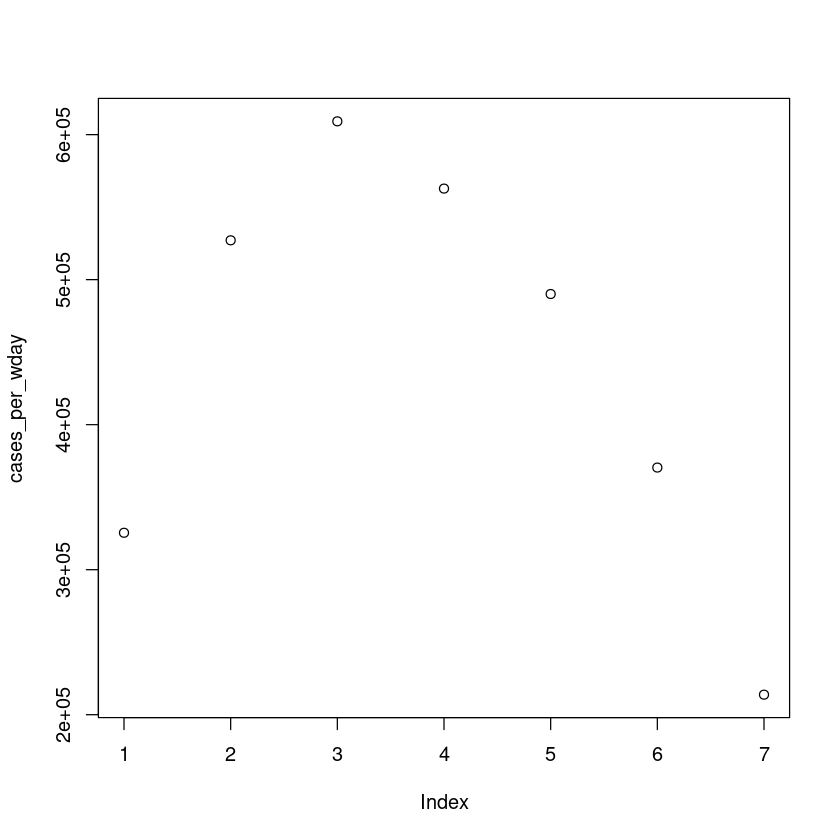

In [64]:
# Diese Statistik können wir dann auch plotten
plot(cases_per_wday)


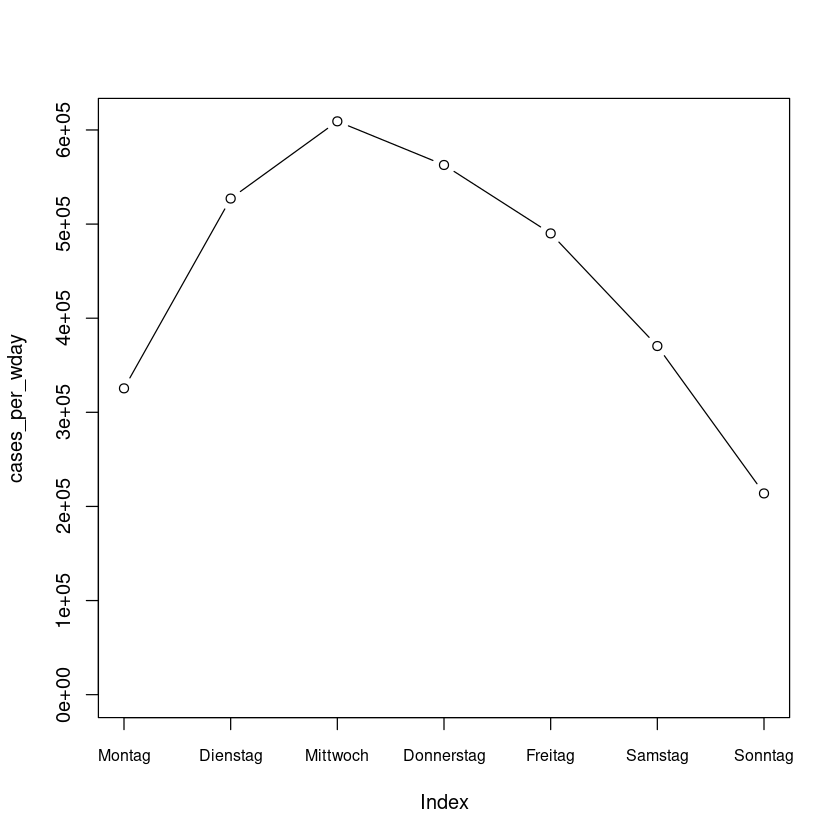

In [63]:
# ... und wieder verschönern
plot(cases_per_wday, type="b", xaxt="n", ylim =c(0,max(cases_per_wday)))
axis(1,at = 1:7,labels = wdays,cex.axis=0.8)

In [52]:
ticks  <- seq(df_cases_per_day$dates[1],df_cases_per_day$dates[length(dates)], by="month")
ticks

 [1] "2020-01-07 CET"  "2020-02-07 CET"  "2020-03-07 CET"  "2020-04-07 CEST"
 [5] "2020-05-07 CEST" "2020-06-07 CEST" "2020-07-07 CEST" "2020-08-07 CEST"
 [9] "2020-09-07 CEST" "2020-10-07 CEST" "2020-11-07 CET"  "2020-12-07 CET" 
[13] "2021-01-07 CET"  "2021-02-07 CET"  "2021-03-07 CET"  "2021-04-07 CEST"

## Aufgabe 
* Erstellt mit der Funktion "axis" einen Plot der die x-Achse der gesamten Zeitreihe besser unterteilt
* Erstellt einen Plot der nur die Daten ab Oktober 2020 abbildet
* Finde heraus, welche Tage im Datensatz fehlen. Was könnte der Grund dafür sein? Ergänze sinnvolle Werte für die fehlenden Tage.


* Berechnet mit einer for-Schleife den laufenden zentrierten siebentägigen Mittelwert definiert als 

\\[ \overline{x}_i = \frac{1}{7} \sum_{j=i-3}^{i+3}x_j, \quad i= 4,...,n-3.  \\]
* Macht euch mit der Funktion runmean aus dem Paket catools bekannt.
* Berechnet den zentrierten siebentägigen Mittelwert mithilfe von runmean
* Erstellt einen Plot für diesen Mittelwert
* Stellt mit unterschiedlichen Farben sowohl normale Daten als auch den Mittelwert im selben Plot dar

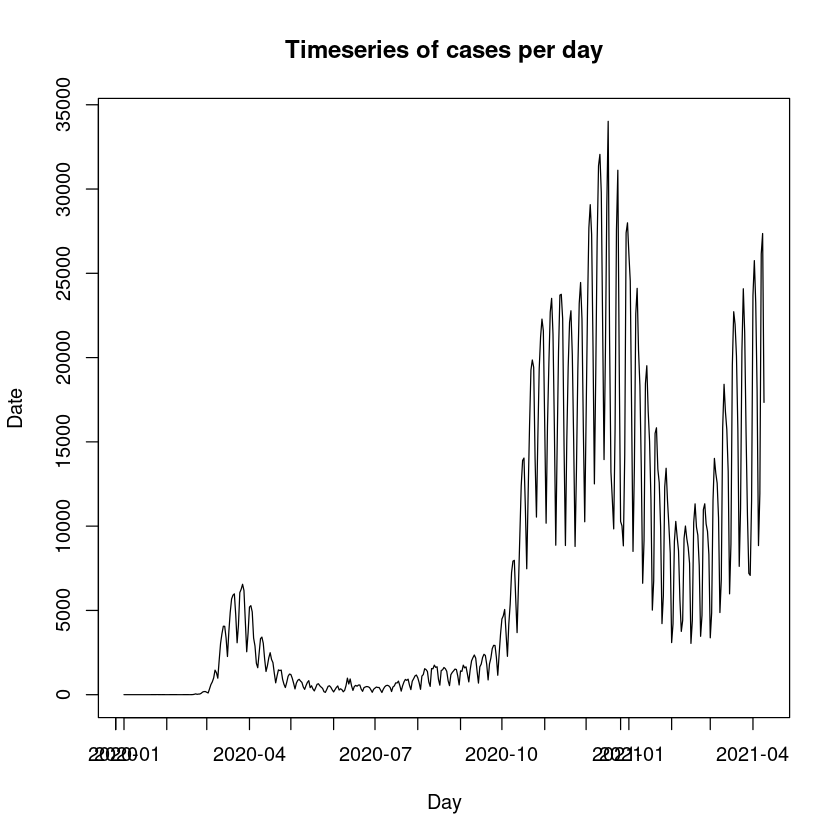

In [36]:
plot(df_cases_per_day$dates,df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")
axis.POSIXct(1,at=ticks,format="%Y-%m")

In [37]:
runmean <- caTools::runmean(df_cases_per_day$cases,k=7,align="center")


In [38]:
df_cases_per_day$runmean <- runmean

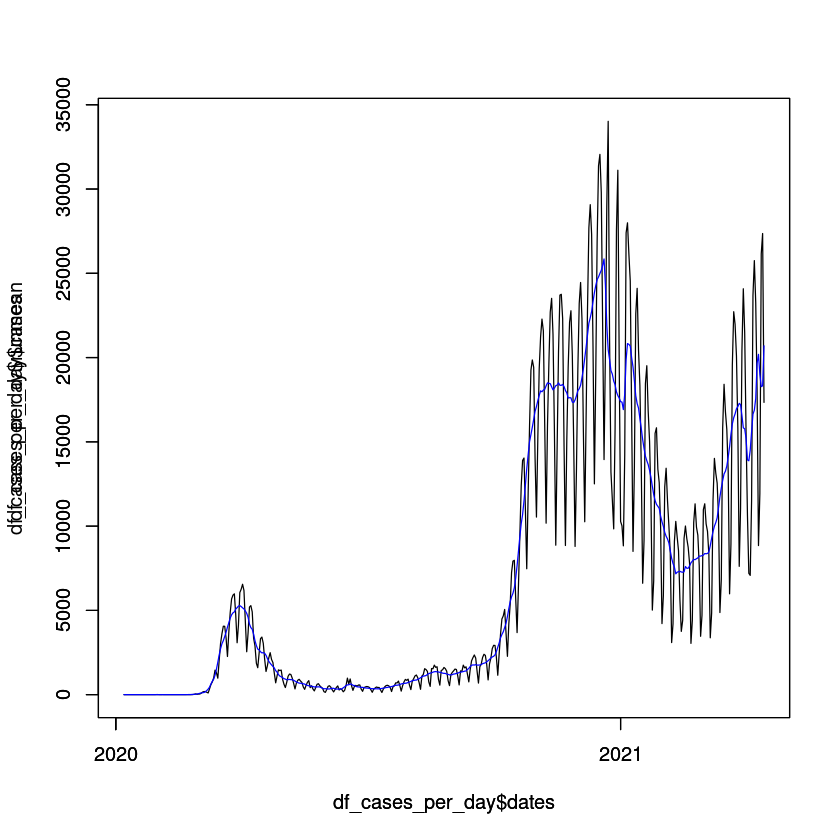

In [39]:
plot(df_cases_per_day$dates,df_cases_per_day$cases,col="black",type="l",ylim=c(0,max(df_cases_per_day$cases)))
par(new=T)
plot(df_cases_per_day$dates,df_cases_per_day$runmean,col="blue",type="l",ylim=c(0,max(df_cases_per_day$cases)))